# Chasen Shaw
## Field Level Project


### Index:
[Problem 1](#problem1) <br>
[Problem 2](#problem2) <br>
[Problem 3](#problem3) <br>
[Problem 4](#problem4) <br>
    - [Problem 4 - plot](#problem4_plot)

In [25]:
#Chasen Shaw
#Field Level Project

import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
import datetime
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
pd.set_option("display.max_columns",999)
pd.options.display.max_rows = 9999
pd.set_option('display.float_format', lambda x: '%.3f' % x)


df_emails = pd.read_csv('/Users/chasenshaw/Documents/fieldlevel-datascience-internship-take-home-main/data/email_data.csv',delimiter=',')
display(df_emails.head())

df_activity = pd.read_csv('/Users/chasenshaw/Documents/fieldlevel-datascience-internship-take-home-main/data/activity_data.csv',delimiter=',')
display(df_activity.head())

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,NaN,NaN
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,NaN,NaN
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,NaN,NaN
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,NaN,NaN
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,NaN,NaN


,UserId,DateOfActivityPST,ActivityCount
0,241710509395,2019-09-24,29
1,241710509395,2020-09-11,60
2,435228414681,2018-01-06,12
3,435228414681,2018-04-20,20
4,435228414681,2018-05-10,136


In [26]:
df2=df_emails

In [27]:
df2

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,NaN,NaN
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,NaN,NaN
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,NaN,NaN
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,NaN,NaN
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,NaN,NaN
...,...,...,...,...,...,...,...,...
474158,283483514928,2021-04-07 19:54:26.493,1057611342894,NaN,NaN,155726404619,NaN,NaN
474159,892415479537,2021-04-08 16:49:23.040,82833411612,NaN,NaN,906354699455,49649.000,"{'DataType':'Address','ZipCode':'MI49649'}"
474160,136876276034,2021-04-01 21:42:34.750,192312213095,NaN,NaN,772106964664,NaN,NaN
474161,32795690300,2021-04-04 18:42:25.683,642285457495,NaN,NaN,944437414453,NaN,NaN


<a id="problem1"></a>

## Problem 1

In [28]:
len(df2)

474163

In [62]:
#So that's the number of rows, but how many emails were really sent?  
int(len(df2)*(100/30))

1580543

In [30]:
df2['EmailSentDateTimeUtc']=pd.to_datetime(df2['EmailSentDateTimeUtc'])
df2['EmailSentDateTimeUtc']=df2['EmailSentDateTimeUtc'].dt.date

In [31]:
df2

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31,792229022220,NaN,NaN,851332105693,NaN,NaN
1,292563123584,2019-08-02,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,NaN,NaN
2,72552047640,2019-08-07,383130475294,NaN,NaN,938684493058,NaN,NaN
3,1089121462891,2019-08-07,792229022220,NaN,NaN,50233193142,NaN,NaN
4,828770719378,2019-08-12,479810600058,NaN,NaN,369293054977,NaN,NaN
...,...,...,...,...,...,...,...,...
474158,283483514928,2021-04-07,1057611342894,NaN,NaN,155726404619,NaN,NaN
474159,892415479537,2021-04-08,82833411612,NaN,NaN,906354699455,49649.000,"{'DataType':'Address','ZipCode':'MI49649'}"
474160,136876276034,2021-04-01,192312213095,NaN,NaN,772106964664,NaN,NaN
474161,32795690300,2021-04-04,642285457495,NaN,NaN,944437414453,NaN,NaN


In [32]:
df3=df2.sort_values(by='EmailSentDateTimeUtc',ignore_index=True).drop_duplicates(subset="UserId",ignore_index=True)
df3

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,892081780205,2018-01-04,866429603262,NaN,NaN,1025328111611,90221.000,"{'DataType':'Address','ZipCode':'90221'}"
1,1046234537527,2018-01-04,866429603262,NaN,NaN,393206302132,94806.000,"{'DataType':'Address','ZipCode':'94806'}"
2,943464008550,2018-01-04,866429603262,NaN,NaN,367303837434,NaN,"{'DataType':'Address','ZipCode':'NULL'}"
3,638034376695,2018-01-04,866429603262,NaN,NaN,11113235298,27610.000,"{'DataType':'Address','ZipCode':'27610'}"
4,238723523985,2018-01-04,866429603262,NaN,NaN,847553624353,44685.000,"{'DataType':'Address','ZipCode':'44685'}"
...,...,...,...,...,...,...,...,...
107320,434264833754,2021-04-19,479810600058,2021-04-19 12:46:45.0000000,2021-04-19 12:46:48.0000000,449905623018,76557.000,"{'DataType':'Address','ZipCode':'76557'}"
107321,212022591596,2021-04-19,479810600058,NaN,NaN,532122714092,31220.000,"{'DataType':'Address','ZipCode':'GA31220'}"
107322,452382187666,2021-04-19,479810600058,2021-04-19 12:59:50.0000000,NaN,863900396257,NaN,NaN
107323,10388764894,2021-04-19,479810600058,NaN,NaN,306758069758,NaN,"{'DataType':'Address','Code':'CD68EB8C-E9F2-42..."


In [33]:
dfA2=df_activity

In [34]:
dfA2

,UserId,DateOfActivityPST,ActivityCount
0,241710509395,2019-09-24,29
1,241710509395,2020-09-11,60
2,435228414681,2018-01-06,12
3,435228414681,2018-04-20,20
4,435228414681,2018-05-10,136
...,...,...,...
4559968,244797108292,2021-02-16,35
4559969,244797108292,2021-03-24,28
4559970,244797108292,2021-03-26,20
4559971,244797108292,2021-03-28,63


In [35]:
dfA2['DateOfActivityPST']=pd.to_datetime(dfA2['DateOfActivityPST'])
dfA3=dfA2.sort_values(by='DateOfActivityPST',ignore_index=True).drop_duplicates(subset="UserId",ignore_index=True)
dfA3

,UserId,DateOfActivityPST,ActivityCount
0,792430628337,2018-01-05,42
1,769039331354,2018-01-05,1
2,679665592485,2018-01-05,48
3,823212352619,2018-01-05,7
4,381318636130,2018-01-05,1
...,...,...,...
90046,869248742125,2021-04-16,215
90047,408240317505,2021-04-16,149
90048,442637307816,2021-04-16,17
90049,818661054262,2021-04-16,59


<a id="problem2"></a>

## Problem 2

In [36]:
dfA3.DateOfActivityPST[1].day
time = dfA3.DateOfActivityPST[1].strftime("%m/%d/%Y")
print("The earliest date is ",time)
time2 = dfA3.DateOfActivityPST[len(dfA3)-1].strftime("%m/%d/%Y")
print("The latest date is ",time2)

The earliest date is  01/05/2018
The latest date is  04/16/2021


<a id="problem3"></a>

## Problem 3

In [37]:
dfA2.sort_values(by='ActivityCount',ascending=False).head(10)

,UserId,DateOfActivityPST,ActivityCount
4145097,46277364190,2020-02-05,9654
3346188,533121182187,2020-08-11,9355
737571,964186867664,2019-03-20,8605
3346185,533121182187,2020-08-08,8537
278802,991870251510,2018-11-02,8379
4484828,86821749325,2021-02-05,8276
2038,671162693073,2018-07-29,8251
2001281,36391931343,2018-10-11,7923
4360584,378807643678,2020-08-25,7640
4108316,665082435208,2020-05-19,7633


<a id="problem4"></a>

## Problem 4

In [40]:
df3=pd.merge(df3,dfA3,on='UserId')

In [41]:
df3

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,DateOfActivityPST,ActivityCount
0,892081780205,2018-01-04,866429603262,NaN,NaN,1025328111611,90221.000,"{'DataType':'Address','ZipCode':'90221'}",2018-01-07,20
1,1046234537527,2018-01-04,866429603262,NaN,NaN,393206302132,94806.000,"{'DataType':'Address','ZipCode':'94806'}",2018-01-08,24
2,943464008550,2018-01-04,866429603262,NaN,NaN,367303837434,NaN,"{'DataType':'Address','ZipCode':'NULL'}",2018-01-05,2
3,638034376695,2018-01-04,866429603262,NaN,NaN,11113235298,27610.000,"{'DataType':'Address','ZipCode':'27610'}",2018-02-06,54
4,238723523985,2018-01-04,866429603262,NaN,NaN,847553624353,44685.000,"{'DataType':'Address','ZipCode':'44685'}",2018-01-08,23
...,...,...,...,...,...,...,...,...,...,...
90046,434264833754,2021-04-19,479810600058,2021-04-19 12:46:45.0000000,2021-04-19 12:46:48.0000000,449905623018,76557.000,"{'DataType':'Address','ZipCode':'76557'}",2020-06-17,40
90047,212022591596,2021-04-19,479810600058,NaN,NaN,532122714092,31220.000,"{'DataType':'Address','ZipCode':'GA31220'}",2020-06-30,237
90048,452382187666,2021-04-19,479810600058,2021-04-19 12:59:50.0000000,NaN,863900396257,NaN,NaN,2019-04-12,16
90049,10388764894,2021-04-19,479810600058,NaN,NaN,306758069758,NaN,"{'DataType':'Address','Code':'CD68EB8C-E9F2-42...",2020-08-22,84


In [47]:
df4=df3
df4

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,DateOfActivityPST,ActivityCount
0,892081780205,2018-01-04,866429603262,NaN,NaN,1025328111611,90221.000,"{'DataType':'Address','ZipCode':'90221'}",2018-01-07,20
1,1046234537527,2018-01-04,866429603262,NaN,NaN,393206302132,94806.000,"{'DataType':'Address','ZipCode':'94806'}",2018-01-08,24
2,943464008550,2018-01-04,866429603262,NaN,NaN,367303837434,NaN,"{'DataType':'Address','ZipCode':'NULL'}",2018-01-05,2
3,638034376695,2018-01-04,866429603262,NaN,NaN,11113235298,27610.000,"{'DataType':'Address','ZipCode':'27610'}",2018-02-06,54
4,238723523985,2018-01-04,866429603262,NaN,NaN,847553624353,44685.000,"{'DataType':'Address','ZipCode':'44685'}",2018-01-08,23
...,...,...,...,...,...,...,...,...,...,...
90046,434264833754,2021-04-19,479810600058,2021-04-19 12:46:45.0000000,2021-04-19 12:46:48.0000000,449905623018,76557.000,"{'DataType':'Address','ZipCode':'76557'}",2020-06-17,40
90047,212022591596,2021-04-19,479810600058,NaN,NaN,532122714092,31220.000,"{'DataType':'Address','ZipCode':'GA31220'}",2020-06-30,237
90048,452382187666,2021-04-19,479810600058,2021-04-19 12:59:50.0000000,NaN,863900396257,NaN,NaN,2019-04-12,16
90049,10388764894,2021-04-19,479810600058,NaN,NaN,306758069758,NaN,"{'DataType':'Address','Code':'CD68EB8C-E9F2-42...",2020-08-22,84


In [43]:
df5=df4.loc[df4.DateOfActivityPST==df4.EmailSentDateTimeUtc]

In [48]:
df5.shape

(1340, 10)

In [49]:
df5.head()

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,DateOfActivityPST,ActivityCount
15,813553430685,2018-01-05,866429603262,NaN,NaN,952397143644,NaN,"{'DataType':'Address','ZipCode':'NULL'}",2018-01-05,18
16,438640021990,2018-01-05,866429603262,NaN,NaN,479898349979,33065.000,"{'DataType':'Address','ZipCode':'33065'}",2018-01-05,111
19,876993063785,2018-01-05,866429603262,NaN,NaN,357509394389,33966.000,"{'DataType':'Address','Code':'7456F2E6-58A1-4B...",2018-01-05,9
22,740062097429,2018-01-05,602589009780,NaN,NaN,284308083678,NaN,NaN,2018-01-05,88
23,74616318139,2018-01-05,866429603262,NaN,NaN,717593232011,73120.000,"{'DataType':'Address','ZipCode':'73120'}",2018-01-05,134


In [50]:
df6=df5

In [51]:
df7=df6.reset_index(drop=True)

In [52]:
sum=1 #since counter starts at 1
counter=1
m=1
m2=1
array={}
dates={}
while m2 < 40:
    if m > 12:
        m=1
    while (df7.EmailSentDateTimeUtc[counter+1].month == m):
        sum=sum+1
        counter=counter+1
    array[m2]=sum
    dates[m2]=df7.EmailSentDateTimeUtc[counter]
    m=m+1
    m2=m2+1
    sum=0
counter=counter+1
#the last month, April, needs to have its days summed and added after the rest are counted
while (df7.EmailSentDateTimeUtc[counter].month == 4 and counter < len(df6)-1):
    sum=sum+1
    counter=counter+1
array[m2]=sum
dates[m2]=df7.EmailSentDateTimeUtc[counter]

In [53]:
sum=1 #since counter starts at 1
counter=1
m=1
m2=1
array2={}
#dates={}
while m2 < 40:
    if m > 12:
        m=1
    while (df3.EmailSentDateTimeUtc[counter+1].month == m):
        sum=sum+1
        counter=counter+1
    array2[m2]=sum
    m=m+1
    m2=m2+1
    sum=0
counter=counter+1
#the last month, April, needs to have its days summed and added after the rest are counted
while (df3.EmailSentDateTimeUtc[counter].month == 4 and counter < len(df3)-1):
    sum=sum+1
    counter=counter+1
array2[m2]=sum

In [54]:
percentages={}
for i in range(1,41):
    percentages[i]=(array[i]/array2[i])*100

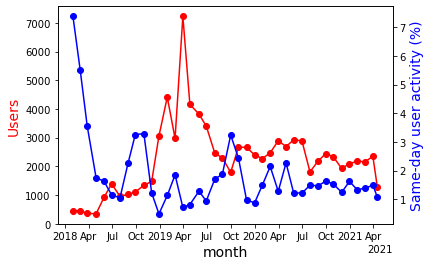

In [55]:
dummy_date = np.arange("2018-01-01",
                       "2021-04-21",
                       dtype ="datetime64")

#random_x = np.random.rand(len(dummy_date))

figure, axes = plt.subplots()

axes.plot(dates.values(), array2.values(), color="red", marker="o")

# set x-axis label
axes.set_xlabel("month",fontsize=14)
# set y-axis label
axes.set_ylabel("Users",color="red",fontsize=14)
ax2=axes.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dates.values(), percentages.values(),color="blue",marker="o")
ax2.set_ylabel("Same-day user activity (%)",color="blue",fontsize=14)
#plt.xticks(np.arange(0, len(x_axis)+1, 10))

axes.xaxis.set(
    major_locator = mdates.AutoDateLocator(minticks = 1,
                                           maxticks = 5),
)

locator = mdates.AutoDateLocator(minticks = 15,
                                 maxticks = 20)
formatter = mdates.ConciseDateFormatter(locator)

axes.xaxis.set_major_locator(locator)
axes.xaxis.set_major_formatter(formatter)

# save the plot as a file
figure.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')

plt.show()

<a id="problem4_plot"></a>